In [1]:
!pip install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re

In [ ]:
nltk.download('all')

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [9]:
hg = []
for i in df_train['text']:
  hg.append(i)

In [19]:
hg[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

**Removing special characters and tokenization**

In [23]:
tweets = []
for i in range(len(hg)):
     tweets.append(re.sub("[^a-zA-Z]", ' ', hg[i]))

In [27]:
tweet = tweets[0].lower()
#tweets = tweets[0].split()

In [ ]:
final_token = []
for i in tokenised_list:
  for k in i:
    final_token.append(k)

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemm_tweets = []
for i in tweets:
  lemm_tweets.append(lem.lemmatize(i, pos="v"))

**Omitting Stopwords**

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
prepared_tweets = []
for i in lemm_tweets:
  if i not in stop_words:
    prepared_tweets.append(i)

In [ ]:
from nltk.tokenize import TweetTokenizer
ttn = TweetTokenizer(strip_handles=True)
tokenised_tweets = []
for i in range(len(tweets)):
  tokenised_tweets.append(ttn.tokenize(tweets[i]))

**Visualizing processed-data**

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(final_token)
fdist.most_common()

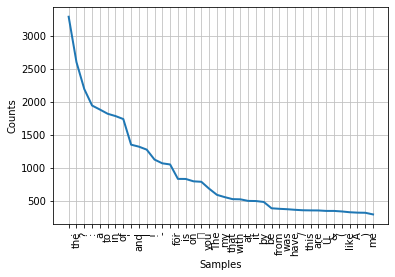

In [ ]:
fdist.plot(40,cumulative=False)
plt.show()

**NLP**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df_train['text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_train['text'], test_size=0.3, random_state=1)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.01795096322241681
